Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


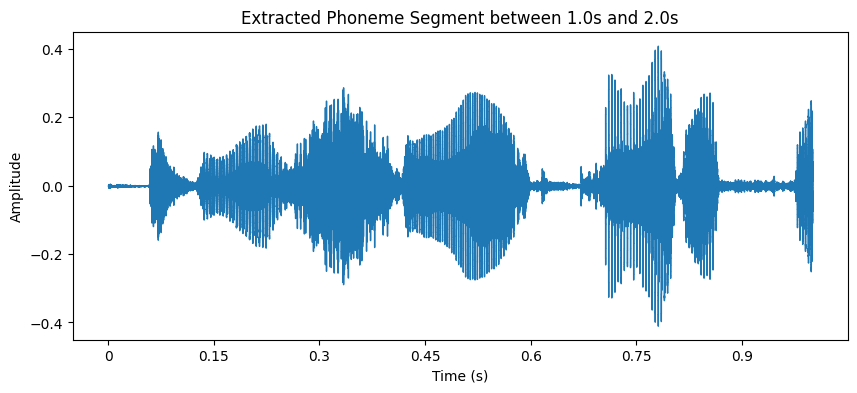

In [3]:
import torchaudio
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import librosa.display
import matplotlib.pyplot as plt

# Loading the speech signal
file_path = "/content/LJ050-0201.wav"
waveform, sr = torchaudio.load(file_path)

# Preprocessing the audio
waveform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)(waveform.mean(dim=0, keepdim=True))
sr = 16000

# Loading pre-trained Wav2Vec2 model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Processing the audio to extract features
input_values = processor(waveform.squeeze().numpy(), return_tensors="pt", sampling_rate=sr).input_values

# Predicting phonemes
with torch.no_grad():
    logits = model(input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
phonemes = processor.decode(predicted_ids[0])

# Extracting a specific phoneme segment
start_time, end_time = 1.0, 2.0
start_sample, end_sample = int(start_time * sr), int(end_time * sr)
segment = waveform[:, start_sample:end_sample]

# Visualizing the waveform of the extracted phoneme segment
plt.figure(figsize=(10, 4))
librosa.display.waveshow(segment.numpy(), sr=sr)
plt.title(f"Extracted Phoneme Segment between {start_time}s and {end_time}s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()